In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt
from skimage.color import label2rgb
from skimage.exposure import adjust_gamma, equalize_adapthist
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_opening
from skimage.morphology import remove_small_objects

from src.fish import find_fish_props, get_head
from src.fish import get_two_sides_img
from src.models import BoundingBox
from src.models import InputImage
from src.utils import normalize_0_255
from src.well import find_well_props

In [3]:
uniform_fig = (50, 40)

In [4]:
def plot_images(images, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary',
                title=None, hist=False, nums=False):
    if count is not None:
        images = images[0:count]

    l = len(images)

    if cols is None:
        cols = 4

    rows = int(l / cols)
    if l < cols: cols = l
    if l % cols != 0 or rows == 0:
        rows += 1

    fig, ax = plt.subplots(rows, cols, figsize=fig)
    ax = ax.ravel()
    for i, img in enumerate(images):
        if i >= l: return

        if nums: ax[i].set_title(f'#{i}')

        if not hist:
            ax[i].imshow(img, cmap)
            if not ticks:  # turn off ticks
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
        else:
            ax[i].hist(img.ravel(), bins=256)
    fig.suptitle(title, fontsize=56)
    plt.tight_layout()


def plot_fishes(fishes, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary'):
    images = list(map(lambda x: x.processed, fishes))  # Change this!
    plot_images(images, cols, count, fig, ticks, cmap)

In [6]:
from src.fish import get_possible_fish

os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\models\\images\\in')
fish_names = os.listdir()
os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\fish')
fishes = []  #[InputImage("zf20.JPG"), InputImage("zf21.JPG"), InputImage("zf3.JPG"), InputImage("zf24.JPG"),InputImage("zf5.JPG"), InputImage("zf9.JPG"), InputImage("zf7.JPG"), InputImage("zf18.JPG")]

#fishes.append(InputImage('zf5.jpg'))
for name in fish_names:
    fishes.append(InputImage(name))

#[InputImage("zf11.JPG"), InputImage("zf12.JPG"), InputImage("zf13.JPG"), InputImage("zf14.JPG"),InputImage("zf15.JPG"), InputImage("zf16.JPG"), InputImage("zf9.JPG"), InputImage("zf10.JPG")]
#[InputImage("zf1.JPG"), InputImage("zf2.JPG"), InputImage("zf3.JPG"), InputImage("zf4.JPG"), InputImage("zf5.JPG"), InputImage("zf6.JPG"), InputImage("zf7.JPG"), InputImage("zf8.JPG")]

for i, fish in enumerate(fishes):
    print(f'#{i}')
    fish.processed = normalize_0_255(fish.processed)  # Normalizing intensity
    fish = find_well_props(fish)

    fish = get_possible_fish(fish)

#0
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for well
_____________________________________________________________
# Circle mask for well created
_____________________________________________________________
# Creating remaining masks:
_____________________________________________________________
# Creating cropped mask
_____________________________________________________________
# Creating masked image (original)
_____________________________________________________________
# Creating masked image (cropped)
_____________________________________________________________
# Created remaining masks
_____________________________________________________________
# Localizing potential embryo
_____________________________________

C:\Users\gimes\.miniconda\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)


# Applying yen-threshold
_____________________________________________________________
# Removing meniscus
_____________________________________________________________
# Keeping only the possible fish
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box of fish
_____________________________________________________________
# Refining mask
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box from OG
_____________________________________________________________
#1
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for we

C:\Users\gimes\.miniconda\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


# Applying yen-threshold
_____________________________________________________________
# Removing meniscus
_____________________________________________________________
# Keeping only the possible fish
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box of fish
_____________________________________________________________
# Refining mask
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box from OG
_____________________________________________________________
#9
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for we

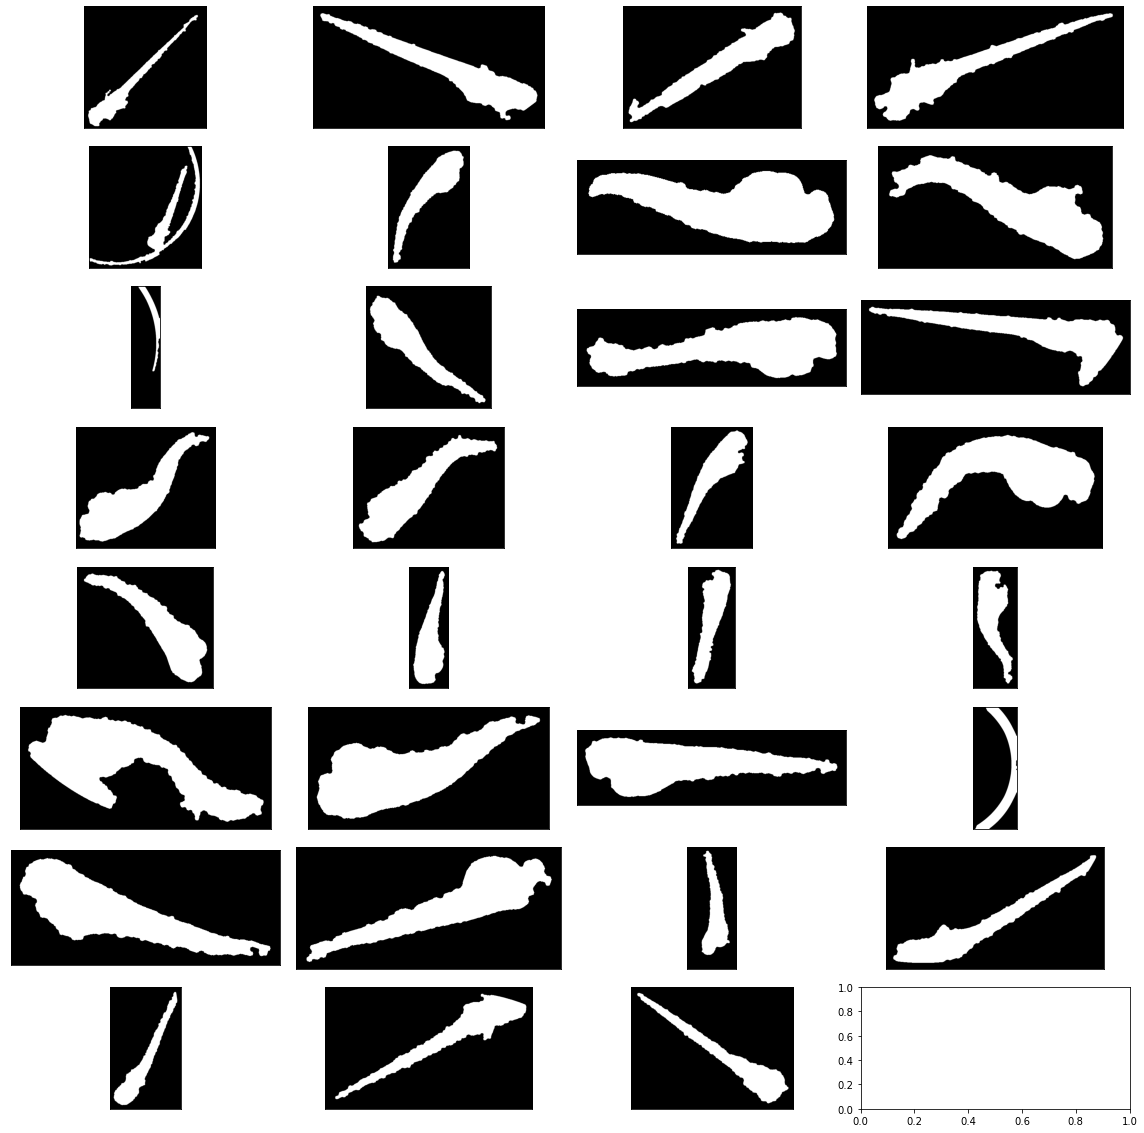

In [7]:
close = []
_close = []

for i, fish in enumerate(fishes):
    closing = binary_opening(fish.fish_props.mask.cropped, disk(1))
    close.append(closing)
    _close.append(fish.fish_props.mask.cropped)

plot_images(close, cmap='gray')

mean: 0.4329023561247546
mean: 0.5167686196516275
mean: 0.20354931895365558
mean: 0.354896707758545
Image is rotated!
mean: 0.27707556414353346
Image is rotated!
mean: 0.4014861339036105
mean: 0.5583415735714985
mean: 0.6049849906966278
Image is rotated!
mean: 0.17392975418054535
mean: 0.2608214749177712
mean: 0.30835806243603503
mean: 0.5820703564353727
mean: 0.19726795375668416
mean: 0.18979715104077777
Image is rotated!
mean: 0.3966246947338157
mean: 0.4381142059903209
mean: 0.5103645669115101
Image is rotated!
mean: 0.4984563696595501
Image is rotated!
mean: 0.3129846368646141
Image is rotated!
mean: 0.33089968342676807
mean: 0.2859361346579268
mean: 0.23831847741720036
mean: 0.43945560519347016
Image is rotated!
mean: 0.3908703560971318
mean: 0.2826648678481634
mean: 0.45119426393614503
Image is rotated!
mean: 0.5923330247473644
mean: 0.4332265129190994
Image is rotated!
mean: 0.39711701240590086
mean: 0.327688611457333
mean: 0.3017042789885735


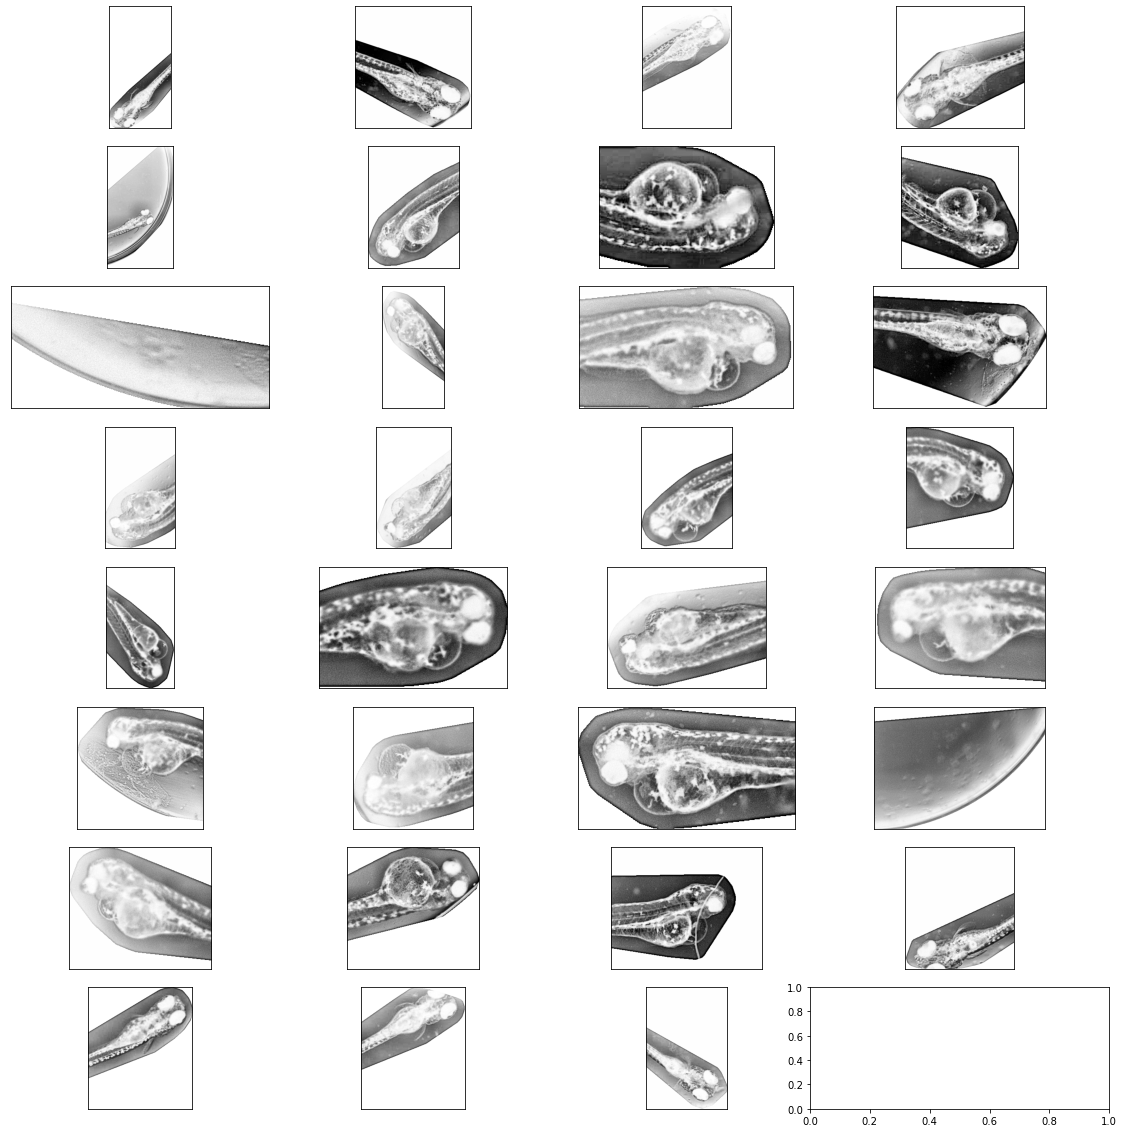

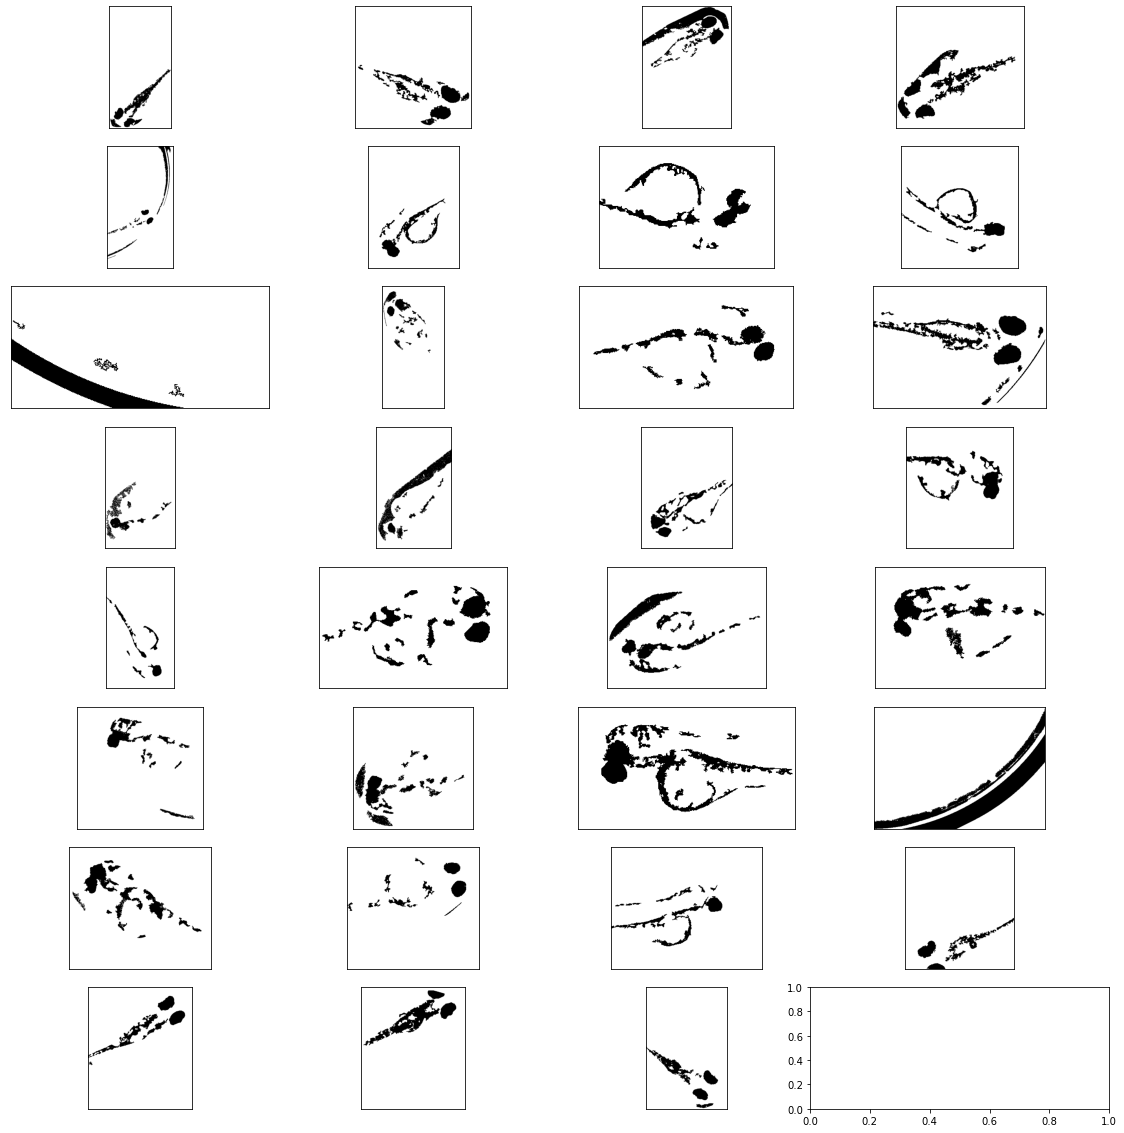

In [65]:
from src.utils import show_img
from skimage.filters._unsharp_mask import unsharp_mask

eyes = []
maskeds = []

def should_be_rotated(img: np.ndarray) -> bool:
    if img.shape[0] > img.shape[1]:
        print('Image is rotated!')
        return True
    return False


for i, fish in enumerate(fishes):

    # mask = fishes[i].fish_props.mask.cropped

    mask = fishes[i].fish_props.mask.og
    masked = adjust_gamma((unsharp_mask(fish.fish_props.cropped_og, radius=2) * mask), gamma=2)

    if fish.fish_props.rotated:
        masked = np.transpose(masked)
        mask = np.transpose(mask)

    sides = get_two_sides_img(masked)  #masked)
    sides_mask = get_two_sides_img(mask)

    #head, side = get_head(masked)
    head, side = get_head(fishes[i].fish_props.mask.cropped)
    if side == 'l':
        head = sides[0]
        head_mask = sides_mask[0]
    else:
        head = sides[1]
        head_mask = sides_mask[1]

    head = equalize_adapthist(head)

    i = np.where(head_mask.astype(bool) == True)

    mean = np.mean(head[i])

    th = (head < mean * 0.3) * head_mask

    """    rotated = should_be_rotated(fish.fish_props.cropped_og)
        fish.fish_props.rotated = rotated

        img = fish.fish_props.cropped_og
        convex_mask = fish.fish_props.mask.og
        mask = fish.fish_props.mask.cropped

        if rotated:
            img = img.transpose()
            mask = mask.transpose()
            convex_mask = convex_mask.transpose()

        show_img(img)
        show_img(mask)
        show_img(convex_mask)

        convex_masked = img * convex_mask

        head, side = get_head(mask)
        sides = get_two_sides_img(convex_masked)
        convex_mask_sides = get_two_sides_img(convex_mask)

        if side == 'l':
            head = sides[0]
            convex_mask = convex_mask_sides[0]
        else:
            head = sides[1]
            convex_mask = convex_mask_sides[1]

        head = (adjust_gamma(unsharp_mask(head, radius=2), gamma=2))
        head = equalize_adapthist(head)

        mean = np.mean(head[head != 0])

        th = (head < mean * 0.3) * convex_mask  # thresholding"""
    print(f'mean: {mean}')

    eyes.append(head)
    maskeds.append(remove_small_objects(th))

plot_images(eyes, cmap='binary')
plot_images(maskeds, cmap='binary')

In [86]:
from skimage.morphology import binary_erosion, binary_closing


def eye_criteria(x):
    # if x.eccentricity > 0.92: return False
    if x.area < 250: return False
    if x.solidity < 0.5: return False
    return True


def eye_spy(fish: np.ndarray):
    rem = np.zeros_like(fish)

    fish = binary_erosion(fish, disk(3))
    fish = binary_opening(fish, disk(3))
    labeled = label(fish)
    rp = regionprops(labeled)

    rp = list(filter(eye_criteria, rp))

    print(f'rp: {len(rp)}')
    for i_, r in enumerate(rp):
        """ print(f'region prop #{i_ + 1}')
        print(f'solidity: {r.solidity}')
        print(f'area: {r.area}')
        print(f'eccentricity: {r.eccentricity}')"""
        bbox = BoundingBox()
        bbox.set(r.bbox)
        #print(f'bb:\n{bbox}')
        rem[bbox.x1:bbox.x2, bbox.y1:bbox.y2] = r.image_convex
        # rem = binary_dilation(rem, disk(2))
    return rem

In [92]:
from src.utils import iterative_dilation
from skimage.morphology import binary_dilation

array = []

for i, fish in enumerate(maskeds[0::]):
    print(f'#{i + 1}')
    gamma_sharp = eye_spy(fish)

    rem = np.zeros_like(fish)
    n = normalize_0_255(gamma_sharp * eyes[i]).astype(np.uint8)
    rp = regionprops(n)
    _1st= None
    _2nd= None
    for _ in rp:
        print(_.area)
        if _1st is None: _1st = rp
        if _2nd is None: _2nd = rp

        if _.intensity_mean>_1st.intesity_mean:
            _1st = _
        if _.intensity_mean>_2nd.intesity_mean:
            _2nd = _

    bbox=BoundingBox()
    bbox.set(_1st.bbox)
    rem[bbox.x1:bbox.x2, bbox.y1:bbox.y2] = _1st.image_convex
    bbox=BoundingBox()
    bbox.set(_2nd.bbox)
    rem[bbox.x1:bbox.x2, bbox.y1:bbox.y2] = _2nd.image_convex

    array.append(rem)

#  plot_images(eyes)
plot_images(array)

#1
rp: 6
9


AttributeError: '<class 'skimage.measure._regionprops.RegionProperties'>' object has no attribute 'intensity_mean'

In [ ]:
from src.fish import should_be_rotated
from skimage.color import gray2rgb
import cv2

grays = []
for i_, gray in enumerate(array):
    gray = normalize_0_255(gray.astype(float))
    gray = cv2.medianBlur(gray.astype(np.uint8), 5)

    rows = gray.shape[1] if should_be_rotated(gray) else gray.shape[0]
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 20,
                               param1=60, param2=10,
                               minRadius=15, maxRadius=int(rows / 10))

    if circles is not None:
        gray = gray2rgb(gray)
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(gray, center, 1, (200, 20, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(gray, center, radius, (200, 20, 100), 3)
        print(f'#{i_} circle count: {len(circles[0])}')
    else:
        print('No circles')
    grays.append(gray)

plot_images(grays, cmap='brg')